# DEBE INSTALAR LAS SIGUIENTES LIBRERIAS:
wittgenstein

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sb
import numpy as np
import wittgenstein as lw
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from IPython.display import Image as PImage
from subprocess import check_call
from PIL import Image, ImageDraw, ImageFont
import matplotlib.pyplot as plt

In [2]:
# load dataset
data = pd.read_csv("mushroom.csv")

In [3]:
data.shape

(8124, 23)

In [4]:
#https://archive.ics.uci.edu/ml/datasets/mushroom
data.head()

,class,Cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below,stalk-color-above,Stalk-color-below,Veil-type,Veil-color,Ring-number,Ring-type,Spore-print,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
#Each species is identified as definitely edible, definitely poisonous, or of unknown edibility and not recommended
data.groupby('class').size()

class
e    4208
p    3916
dtype: int64

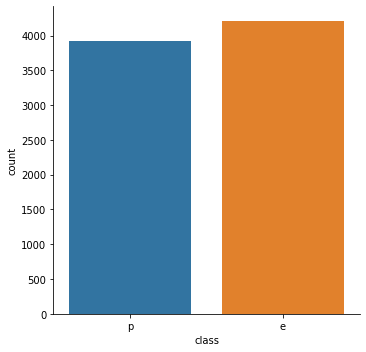

In [6]:
sb.catplot('class',data=data,kind="count")

In [7]:
train, test = train_test_split(data, test_size=.33)

## RIPPER classifier

In [8]:
mdl = lw.RIPPER()
#RIPPER classifier  with the positive, in our clase is poisonous.
mdl.fit(train, class_feat='class', pos_class='p')
#mdl.ruleset_

## Testing model

In [9]:
X_test = test.drop('class', axis=1)
y_test = test['class']

## Performance model

In [10]:
precision = mdl.score(X_test, y_test, precision_score)
cond_count = mdl.ruleset_.count_conds()
print(f'precision: {precision} conds: {cond_count}')

precision: 1.0 conds: 12


## Classify with the DT

In [11]:
mdl.ruleset_.out_pretty()

[[odor=f] V
[gill-size=n ^ gill-color=b] V
[gill-size=n ^ odor=p] V
[odor=c] V
[Spore-print=r] V
[stalk-surface-below=y ^ stalk-surface-above=k] V
[stalk-color-above=y] V
[habitat=l ^ cap-color=w]]


In [12]:
y_pred=mdl.predict(X_test, give_reasons=True)
y_pred
#y_pred=mdl.predict(X_test)
#print(accuracy_score(y_test,y_pred))

([True,
  True,
  True,
  False,
  False,
  False,
  False,
  True,
  True,
  True,
  True,
  True,
  True,
  False,
  True,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  True,
  False,
  True,
  False,
  True,
  False,
  False,
  True,
  False,
  False,
  False,
  True,
  True,
  True,
  True,
  False,
  False,
  False,
  True,
  False,
  True,
  True,
  True,
  True,
  False,
  True,
  False,
  False,
  False,
  False,
  True,
  False,
  True,
  True,
  False,
  False,
  True,
  True,
  False,
  True,
  True,
  False,
  True,
  True,
  False,
  True,
  False,
  True,
  True,
  False,
  False,
  True,
  True,
  True,
  False,
  True,
  True,
  True,
  False,
  False,
  True,
  True,
  False,
  True,
  False,
  True,
  False,
  False,
  True,
  False,
  False,
  False,
  True,
  False,
  True,
  True,
  False,
  False,
  False,
  True,
  False,
  True,
  False,
  True,
  False,
  False,
  True,
  True,
  False,
  True,
  False,
  True,
  True,
  True,
  True,


## Generate Rules from DT

In [36]:
# load dataset
data = pd.read_csv("mushroom.csv")

y = data['class']
x = data.drop(['class'], axis=1)

#Convert categorical variable into dummy/indicator variables.
x = pd.get_dummies(x)
y = pd.get_dummies(y)

x.info()
#y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Columns: 117 entries, Cap-shape_b to habitat_w
dtypes: uint8(117)
memory usage: 928.4 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   e       8124 non-null   uint8
 1   p       8124 non-null   uint8
dtypes: uint8(2)
memory usage: 16.0 KB


In [49]:
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.3)
arbol = DecisionTreeClassifier(criterion='gini')
arbol.fit(X_train,y_train)
y_pred=arbol.predict(X_test)

1.0

In [53]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",accuracy_score(y_test, y_pred))

Accuracy: 1.0


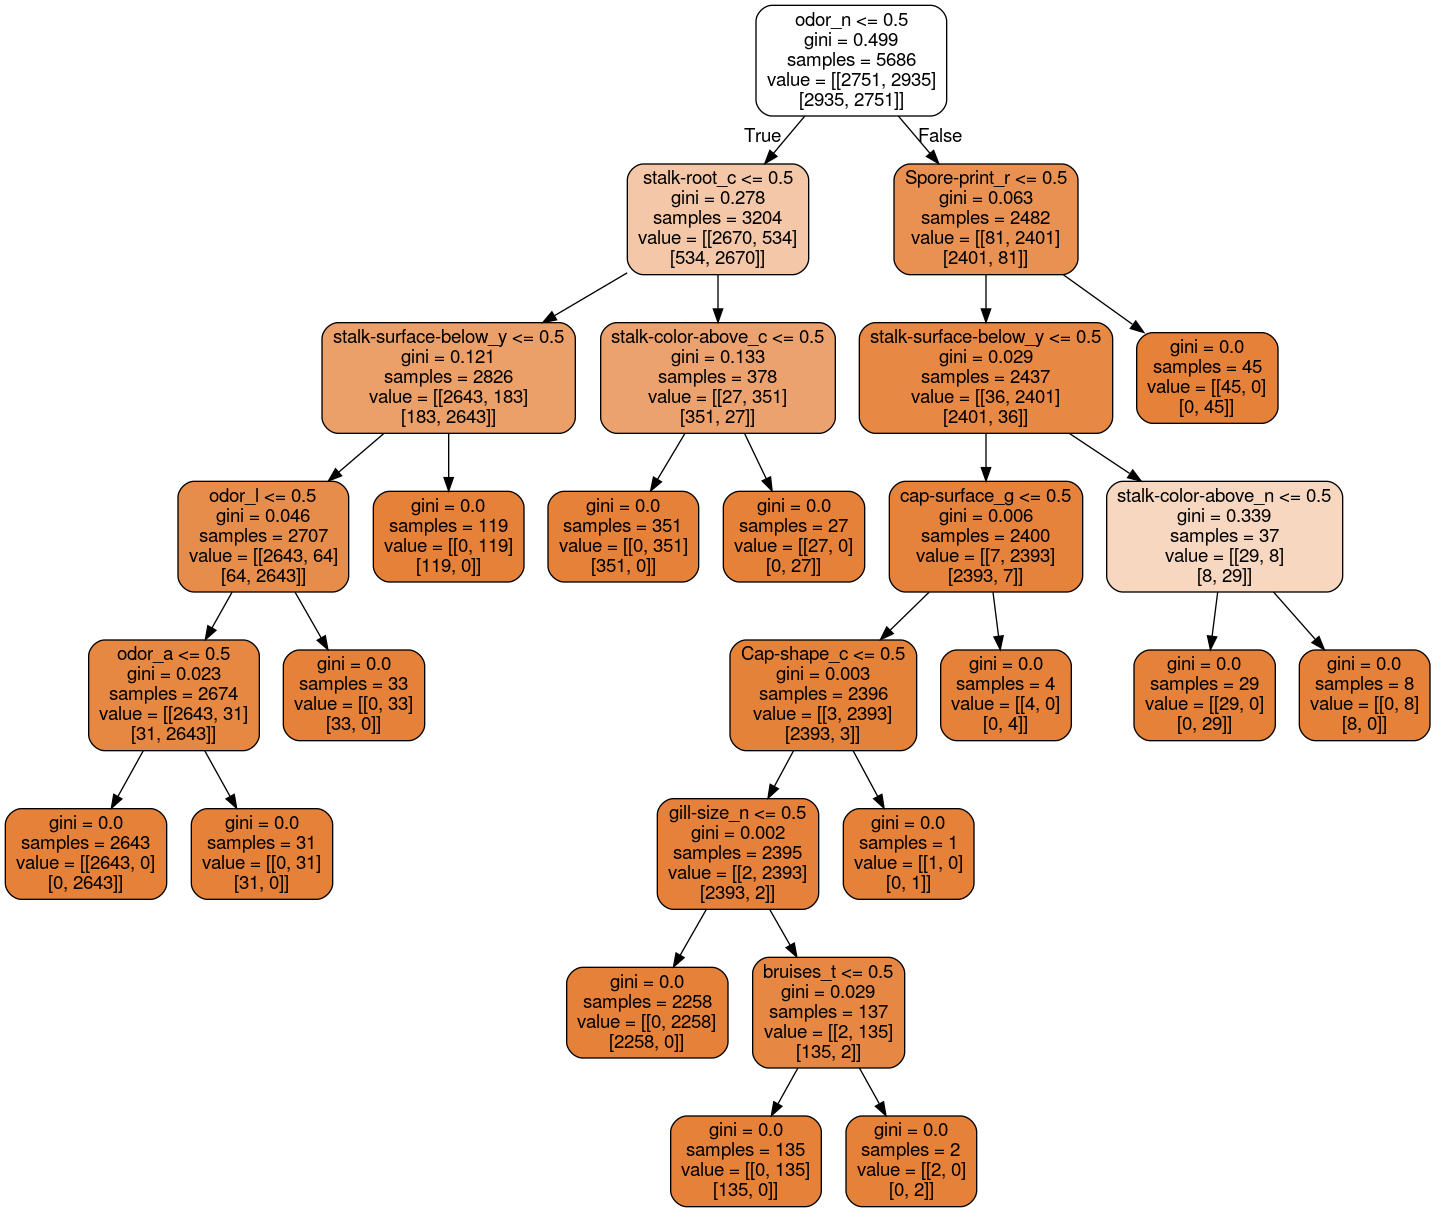

In [40]:
# exportar el modelo a archivo .dot
with open(r"dt_tree.dot", 'w') as f:
     f = tree.export_graphviz(arbol, out_file=f, impurity = True,
                              class_names= y_test.columns,  feature_names = X_test.columns,rounded = True, filled= True)
# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'dt_tree.dot','-o',r'dt_tree.png'])
PImage("dt_tree.png")

Text(0.5, 1.0, 'Feature importances')

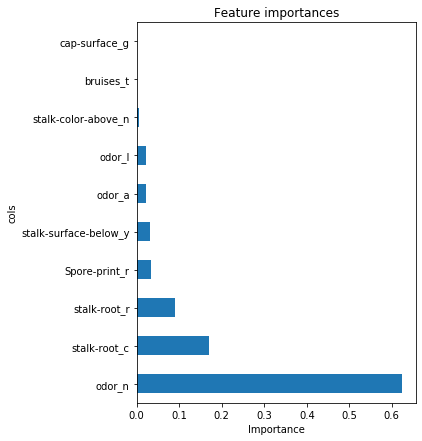

In [71]:
df = pd.DataFrame({'cols':X_train.columns.values, 'imp':arbol.feature_importances_}).sort_values('imp', ascending=False)
df[:10].plot('cols', 'imp', 'barh', figsize=(5,7), legend=False)
plt.xlabel('Importance')
plt.title('Feature importances')

## Get rules from DT

In [78]:
#https://stackoverflow.com/questions/20224526/how-to-extract-the-decision-rules-from-scikit-learn-decision-tree
def get_rule(tree, path, feature_names):
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold
    
    mask = ''
    for index, node in enumerate(path):
        #We check if we are not in the leaf
        if index!=len(path)-1:
            # Do we go under or over the threshold ?
            if (children_left[node] == path[index+1]):
                mask += "('{}'<= {}) \t ".format(feature_names[feature[node]], threshold[node])
            else:
                mask += "('{}'> {}) \t ".format(feature_names[feature[node]], threshold[node])

    # We insert the & at the right places
    mask = mask.replace("\t", "&", mask.count("\t") - 1)
    mask = mask.replace("\t", "")
    return mask

In [73]:
def find_paths(tree,node_numb,path, x):
    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold
    
    def find_path(node_numb, path, x):
        path.append(node_numb)
        if node_numb == x:
            return True
        left = False
        right = False

        if (children_left[node_numb] !=-1):
            left = find_path(children_left[node_numb], path, x)
        if (children_right[node_numb] !=-1):
            right = find_path(children_right[node_numb], path, x)
        if left or right:
            return True

        path.remove(node_numb)
        return False
    
    find_path(0, path_leaf, leaf)

In [79]:
# Traverse the Leaves
leave_id = arbol.apply(X_test)
paths ={}
for leaf in np.unique(leave_id):
    path_leaf = []
    find_paths(arbol,0, path_leaf, leaf)
    paths[leaf] = np.unique(np.sort(path_leaf))

rules = {}
for key in paths:
    rules[key] = get_rule(arbol,paths[key], list(X_train.columns.values))
    print(rules[key])

('odor_n'<= 0.5) & ('stalk-root_c'<= 0.5) & ('stalk-root_r'<= 0.5) & ('odor_a'<= 0.5) & ('odor_l'<= 0.5)  
('odor_n'<= 0.5) & ('stalk-root_c'<= 0.5) & ('stalk-root_r'<= 0.5) & ('odor_a'<= 0.5) & ('odor_l'> 0.5)  
('odor_n'<= 0.5) & ('stalk-root_c'<= 0.5) & ('stalk-root_r'<= 0.5) & ('odor_a'> 0.5)  
('odor_n'<= 0.5) & ('stalk-root_c'<= 0.5) & ('stalk-root_r'> 0.5)  
('odor_n'<= 0.5) & ('stalk-root_c'> 0.5) & ('stalk-surface-below_y'<= 0.5)  
('odor_n'<= 0.5) & ('stalk-root_c'> 0.5) & ('stalk-surface-below_y'> 0.5)  
('odor_n'> 0.5) & ('Spore-print_r'<= 0.5) & ('stalk-surface-below_y'<= 0.5) & ('cap-surface_g'<= 0.5) & ('gill-size_n'<= 0.5)  
('odor_n'> 0.5) & ('Spore-print_r'<= 0.5) & ('stalk-surface-below_y'<= 0.5) & ('cap-surface_g'<= 0.5) & ('gill-size_n'> 0.5) & ('bruises_t'<= 0.5)  
('odor_n'> 0.5) & ('Spore-print_r'<= 0.5) & ('stalk-surface-below_y'<= 0.5) & ('cap-surface_g'<= 0.5) & ('gill-size_n'> 0.5) & ('bruises_t'> 0.5)  
('odor_n'> 0.5) & ('Spore-print_r'<= 0.5) & ('stalk-su